In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [4]:
df.shape

(555719, 23)

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','merchant','first','last','street','city','zip','lat','long','dob','trans_num','unix_time','merch_lat','merch_long'],inplace=True)

In [8]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,personal_care,2.86,M,SC,333497,Mechanical engineer,0
1,personal_care,29.84,F,UT,302,"Sales professional, IT",0
2,health_fitness,41.28,F,NY,34496,"Librarian, public",0
3,misc_pos,60.05,M,FL,54767,Set designer,0
4,travel,3.19,M,MI,1126,Furniture designer,0


In [9]:
df.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [10]:
df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [11]:
category_df=(pd.get_dummies(df['category'])).astype(int)

In [12]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
df.drop(columns=['category'],inplace=True)

In [14]:
df=pd.concat([df,category_df],axis=1)

In [15]:
df.head()

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2.86,M,SC,333497,Mechanical engineer,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,F,UT,302,"Sales professional, IT",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,F,NY,34496,"Librarian, public",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,M,FL,54767,Set designer,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,M,MI,1126,Furniture designer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [17]:
df['gender'].replace({'F':1,'M':0},inplace=True)

<ipython-input-17-303b43515168>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F':1,'M':0},inplace=True)
<ipython-input-17-303b43515168>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F':1,'M':0},inplace=True)


In [18]:
df['gender'].unique()

array([0, 1])

In [19]:
df['state'].unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK'], dtype=object)

In [20]:
state_df=(pd.get_dummies(df['state'])).astype(int)
df.drop(columns=['state'],inplace=True)
df=pd.concat([df,state_df],axis=1)
df.shape

(555719, 69)

In [21]:
df['job'].unique().shape

(478,)

In [22]:
job_df=(pd.get_dummies(df['job'])).astype(int)
df.drop(columns=['job'],inplace=True)
df=pd.concat([df,job_df],axis=1)
df.shape

(555719, 546)

In [23]:
df.head()

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,2.86,0,333497,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.84,1,302,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41.28,1,34496,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60.05,0,54767,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.19,0,1126,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X=df.drop(columns=['is_fraud'])
y=df['is_fraud']

In [25]:
y.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [26]:
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)

In [27]:
y.value_counts()

is_fraud
0    553574
1    553574
Name: count, dtype: int64

In [28]:
X.shape

(1107148, 545)

In [29]:
X.describe()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
count,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,...,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06,1.107148e+06
mean,2.989112e+02,4.879980e-01,7.628356e+04,3.959453e-02,4.048872e-02,6.226178e-02,1.936056e-02,1.390419e-01,3.566822e-02,5.219176e-02,...,1.175091e-03,1.166059e-03,8.056737e-04,1.210317e-03,1.009802e-03,3.083599e-03,2.023216e-04,9.989631e-04,3.729402e-03,2.140635e-04
std,3.741930e+02,4.998562e-01,2.630568e+05,1.950047e-01,1.971025e-01,2.416305e-01,1.377888e-01,3.459904e-01,1.854617e-01,2.224136e-01,...,3.425947e-02,3.412771e-02,2.837297e-02,3.476857e-02,3.176134e-02,5.544450e-02,1.422255e-02,3.159060e-02,6.095488e-02,1.462935e-02
min,1.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.125000e+01,0.000000e+00,8.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.993000e+01,0.000000e+00,2.691000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.824405e+02,1.000000e+00,1.542600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.276811e+04,1.000000e+00,2.906700e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [30]:
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X)

<ipython-input-30-7af1452f196a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.14726886e-01 9.59858973e-05 1.18599349e-02 ... 3.82223412e-04
 4.10090285e-04 3.82567447e-04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:]=scaler.fit_transform(X)


In [31]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000082,0,0.114727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001267,1,0.000096,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.001769,1,0.011860,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.002594,0,0.018834,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000096,0,0.000379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((885718, 545), (221430, 545), (885718,), (221430,))

In [34]:
y_train.value_counts()

is_fraud
0    443152
1    442566
Name: count, dtype: int64

In [35]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # Define input layer properly
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.fit(np.array(X_train),np.array(y_train),epochs=10, batch_size=256)

Epoch 1/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9628 - loss: 0.0891
Epoch 2/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9905 - loss: 0.0253
Epoch 3/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9932 - loss: 0.0177
Epoch 4/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9942 - loss: 0.0151
Epoch 5/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9946 - loss: 0.0139
Epoch 6/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9948 - loss: 0.0132
Epoch 7/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9951 - loss: 0.0123
Epoch 8/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9952 - loss: 0.0121
Epoch 9/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9957 - loss: 0.0110
Epoch 10/10
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9957 - loss: 0.0109


In [36]:
loss, accuracy=model.evaluate(X_test,y_test)
print(f"Model Accuracy :{accuracy*100}")

6920/6920 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9958 - loss: 0.0122
Model Accuracy :99.57232475280762


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         163,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 627,305 (2.39 MB)

 Trainable params: 209,101 (816.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 418,204 (1.60 MB)

In [38]:
pred=model.predict(X_test)

6920/6920 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [39]:
binary_pred=((pred>0.5)).astype('int')

In [40]:
print(classification_report(y_test,binary_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110422
           1       0.99      1.00      1.00    111008

    accuracy                           1.00    221430
   macro avg       1.00      1.00      1.00    221430
weighted avg       1.00      1.00      1.00    221430



Text(50.722222222222214, 0.5, 'Actual')

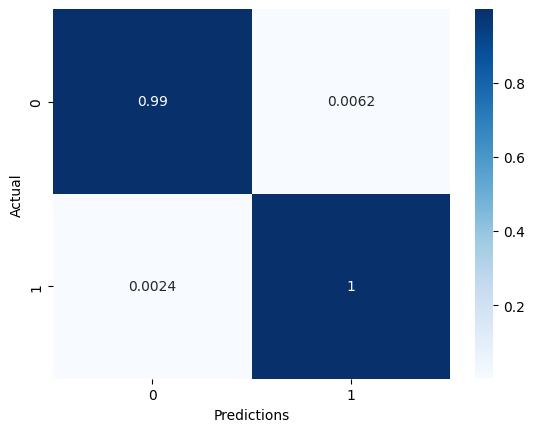

In [41]:
cf=confusion_matrix(y_test,binary_pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")